In [1]:
#importing Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 750, 'display.max_columns', 130) # To display all the rows and columns in the data frame

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
#Loading and Basic Data Understanding

In [4]:
# Data loading refers to the process of importing or reading data. We will be loading a CSV file ("loan.csv") into a Pandas DataFrame (loan_df) for our EDA processes.

# Using CSV file relative path
file_path = "day.csv"

# Load the CSV file into Pandas DataFrame using a relative path
boombikes_df = pd.read_csv(file_path)

In [5]:
boombikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
boombikes_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [7]:
# Check the descriptive information
boombikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
boombikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
boombikes_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
# Cheking details of columns if the they are nulls or blanks as value.
(boombikes_df.isnull().sum()*100)/len(boombikes_df)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [11]:
# Checking for dupicate values
len(boombikes_df[boombikes_df.duplicated()])

0

In [12]:
boombikes_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
#Dataset fields

#instant: record index
#dteday : date
#season : season (1:spring, 2:summer, 3:fall, 4:winter)
#yr : year (0: 2018, 1:2019)
#mnth : month ( 1 to 12)
#holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
#weekday : day of the week
#workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#	+ weathersit :
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#temp : temperature in Celsius
#atemp: feeling temperature in Celsius
#hum: humidity
#windspeed: wind speed
#casual: count of casual users
#registered: count of registered users
#cnt: count of total rental bikes including both casual and registered

In [14]:
# observation :
# There are 16 rows and 730 columns.
# The data is a mixture of various data types including, int, float,object, ect.
# There are no headers/footers or summary details rows.
# There are no null or null columns or rows

In [15]:
# Removing redundant & unwanted columns
# Creating a list of columns to be removed/dropped
remove_cols = ['instant', 'dteday', 'casual', 'registered']

# Creating a Loop to drop the columns
for i in boombikes_df.columns:
    if i in remove_cols:
        boombikes_df.drop(labels = i, axis= 1, inplace= True)

#Inspecting dataframe
boombikes_df.head()

# instant : Its only an index value
# dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.
# casual & registered : Both these columns contains the count of bike booked by different categories of customers.

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


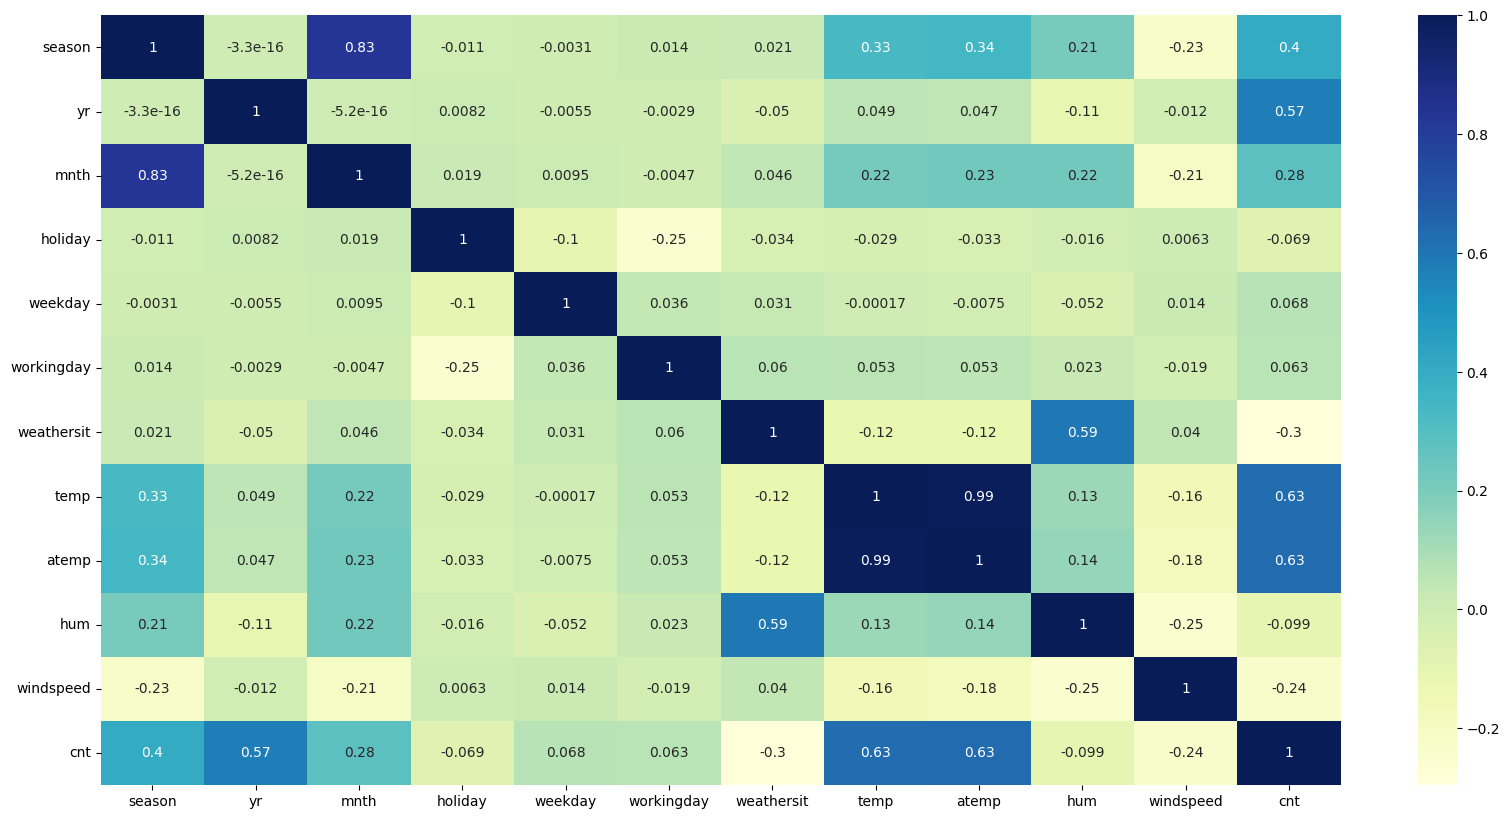

In [16]:
#heatmap
# Visual representation of the correlations between the variables present in the data
plt.figure(figsize=(20,10))
sns.heatmap(boombikes_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [17]:
# Mapping the season, month, weekday, weathersit(weather situation)  variables to their respective categorical values

In [18]:
#Mapping the weathetsit variable to their respective categorical values
def weathersit_map(x):
       return x.map({1: 'Clear', 2: 'Cloudy', 3: 'Light Snow & Rain', 4: 'Heavy Rain and snow'})

# Apply the function to the 'Response' column of the dataframe
boombikes_df[['weathersit']] = boombikes_df[['weathersit']].apply(weathersit_map)

# checking the value counts of the records post mapping
boombikes_df['weathersit'].value_counts()

Clear                463
Cloudy               246
Light Snow & Rain     21
Name: weathersit, dtype: int64

In [19]:
#Mapping the weekday variable to their respective categorical values
def weekday_map(x):
    return x.map({1: 'Mon', 2: 'Tue', 3: 'Wed',  4: 'Thur', 5: 'Fri', 6: 'Sat', 0: 'Sun'})

# Apply the function to the 'Response' column of the dataframe
boombikes_df[['weekday']] = boombikes_df[['weekday']].apply(weekday_map)

# checking the value counts of the records post mapping
boombikes_df['weekday'].value_counts()

Sat     105
Sun     105
Mon     105
Tue     104
Thur    104
Fri     104
Wed     103
Name: weekday, dtype: int64

In [20]:
#Mapping the seasonvariable to their respective categorical values
def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Apply the function to the 'Response' column of the dataframe
boombikes_df[['season']] = boombikes_df[['season']].apply(season_map)

# checking the value counts of the records post mapping
boombikes_df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [21]:
#Mapping the month variable to their respective categorical values
def mnth_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar',  4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Apply the function to the 'Response' column of the dataframe
boombikes_df[['mnth']] = boombikes_df[['mnth']].apply(mnth_map)

# checking the value counts of the records post mapping
boombikes_df['mnth'].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [22]:
#Checking the no of rows and columns of the data
boombikes_df.shape

(730, 12)

In [23]:
#displaying the values post changes
boombikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
boombikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [25]:
# Explortory Data Analysis

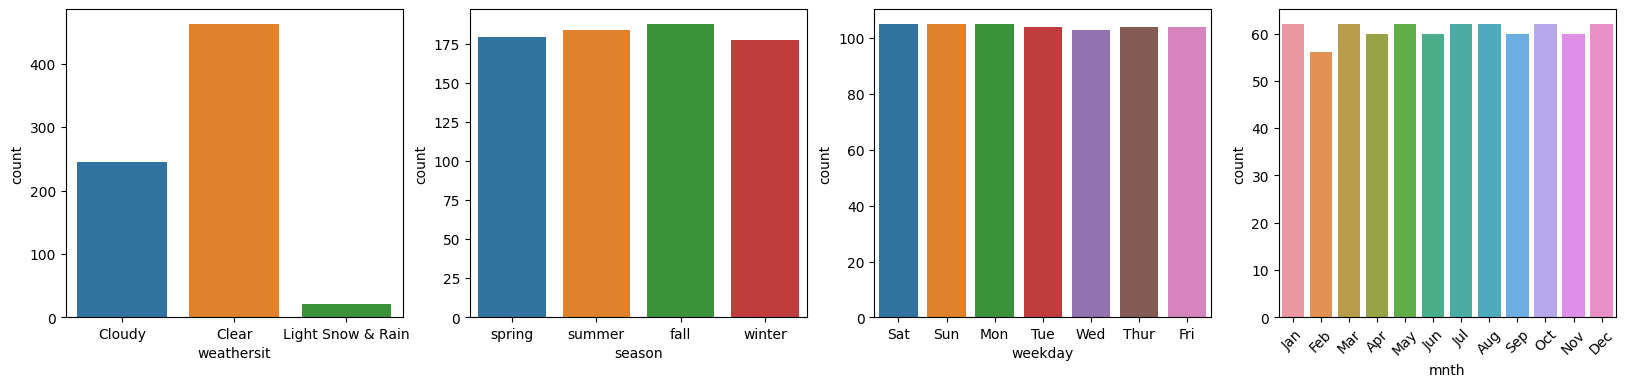

In [26]:
# Univariate Analysis

# Visualizing Categorical Variables
plt.figure(figsize = [20,4])
plt.subplot(141)
sns.countplot(data = boombikes_df, x = 'weathersit')
plt.subplot(142)
sns.countplot(data = boombikes_df, x = 'season')
plt.subplot(143)
sns.countplot(data = boombikes_df, x = 'weekday')
plt.subplot(144)
plt.xticks(rotation = 45)
sns.countplot(data = boombikes_df, x = 'mnth')
plt.show()

In [27]:
# Observations:
# Fall emerges as the lengthiest season, trailed by summer and then spring. Winter stands as the shortest season in this analysis.
# Weathersit denotes only three weather types. Notably, there hasn't been a single occurrence of heavy rain or snow. Most days in both years have experienced clear or partly cloudy weather conditions.
# The unique correlation between season and weathersit strongly suggests that the city in the dataset resides in a tropical region characterized by limited rainfall. The weather pattern closely resembles that of certain West Coast cities in the US, such as Los Angeles or San Francisco in California. This conclusion gains further support from the recorded data on humidity, temperature, and apparent temperature (atemp).

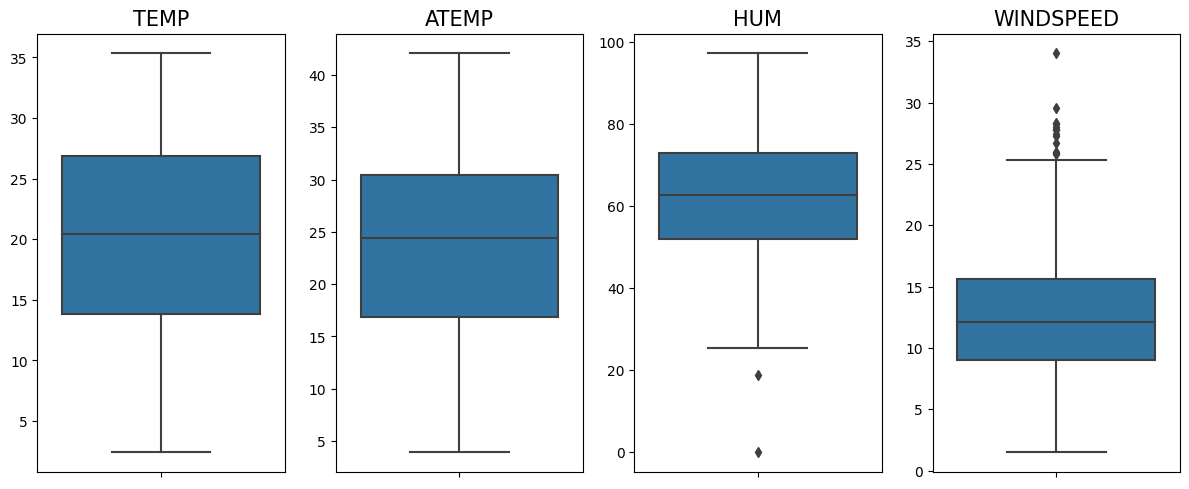

In [28]:
# Visualizing continuous Variables

# Creating a list of continuous independent variables for analysis
cont_var =  [i for i in boombikes_df.select_dtypes(exclude= 'object').columns if boombikes_df[i].nunique() > 2 and i != 'cnt']

# Creating a subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= len(cont_var), figsize= (12, 5))

# Looping to fill subplot grid with plots
for i in range(len(cont_var)):
    sns.boxplot(y=boombikes_df[cont_var[i]], ax= ax[i])
    ax[i].set_title(f'{cont_var[i].upper()}', fontsize= 15)
    ax[i].set_ylabel('')
# Setting final aesthetics
plt.tight_layout()
plt.show()

In [29]:
# Observation
# The interquartile range (Q1-Q3) for temperature (temp) spans from 14 to 27, with a median of 21.
# Apparent temperature (atemp) also exhibits an interquartile range between 17 and 31, with a median of 24.
# Outliers and irregularities are noticeable in the distribution of humidity and windspeed.
# Both temperature (temp) and apparent temperature (atemp) portray a distribution that closely resembles a normal distribution, indicating a typical pattern in their values.

In [30]:
# Bivariate Analysis

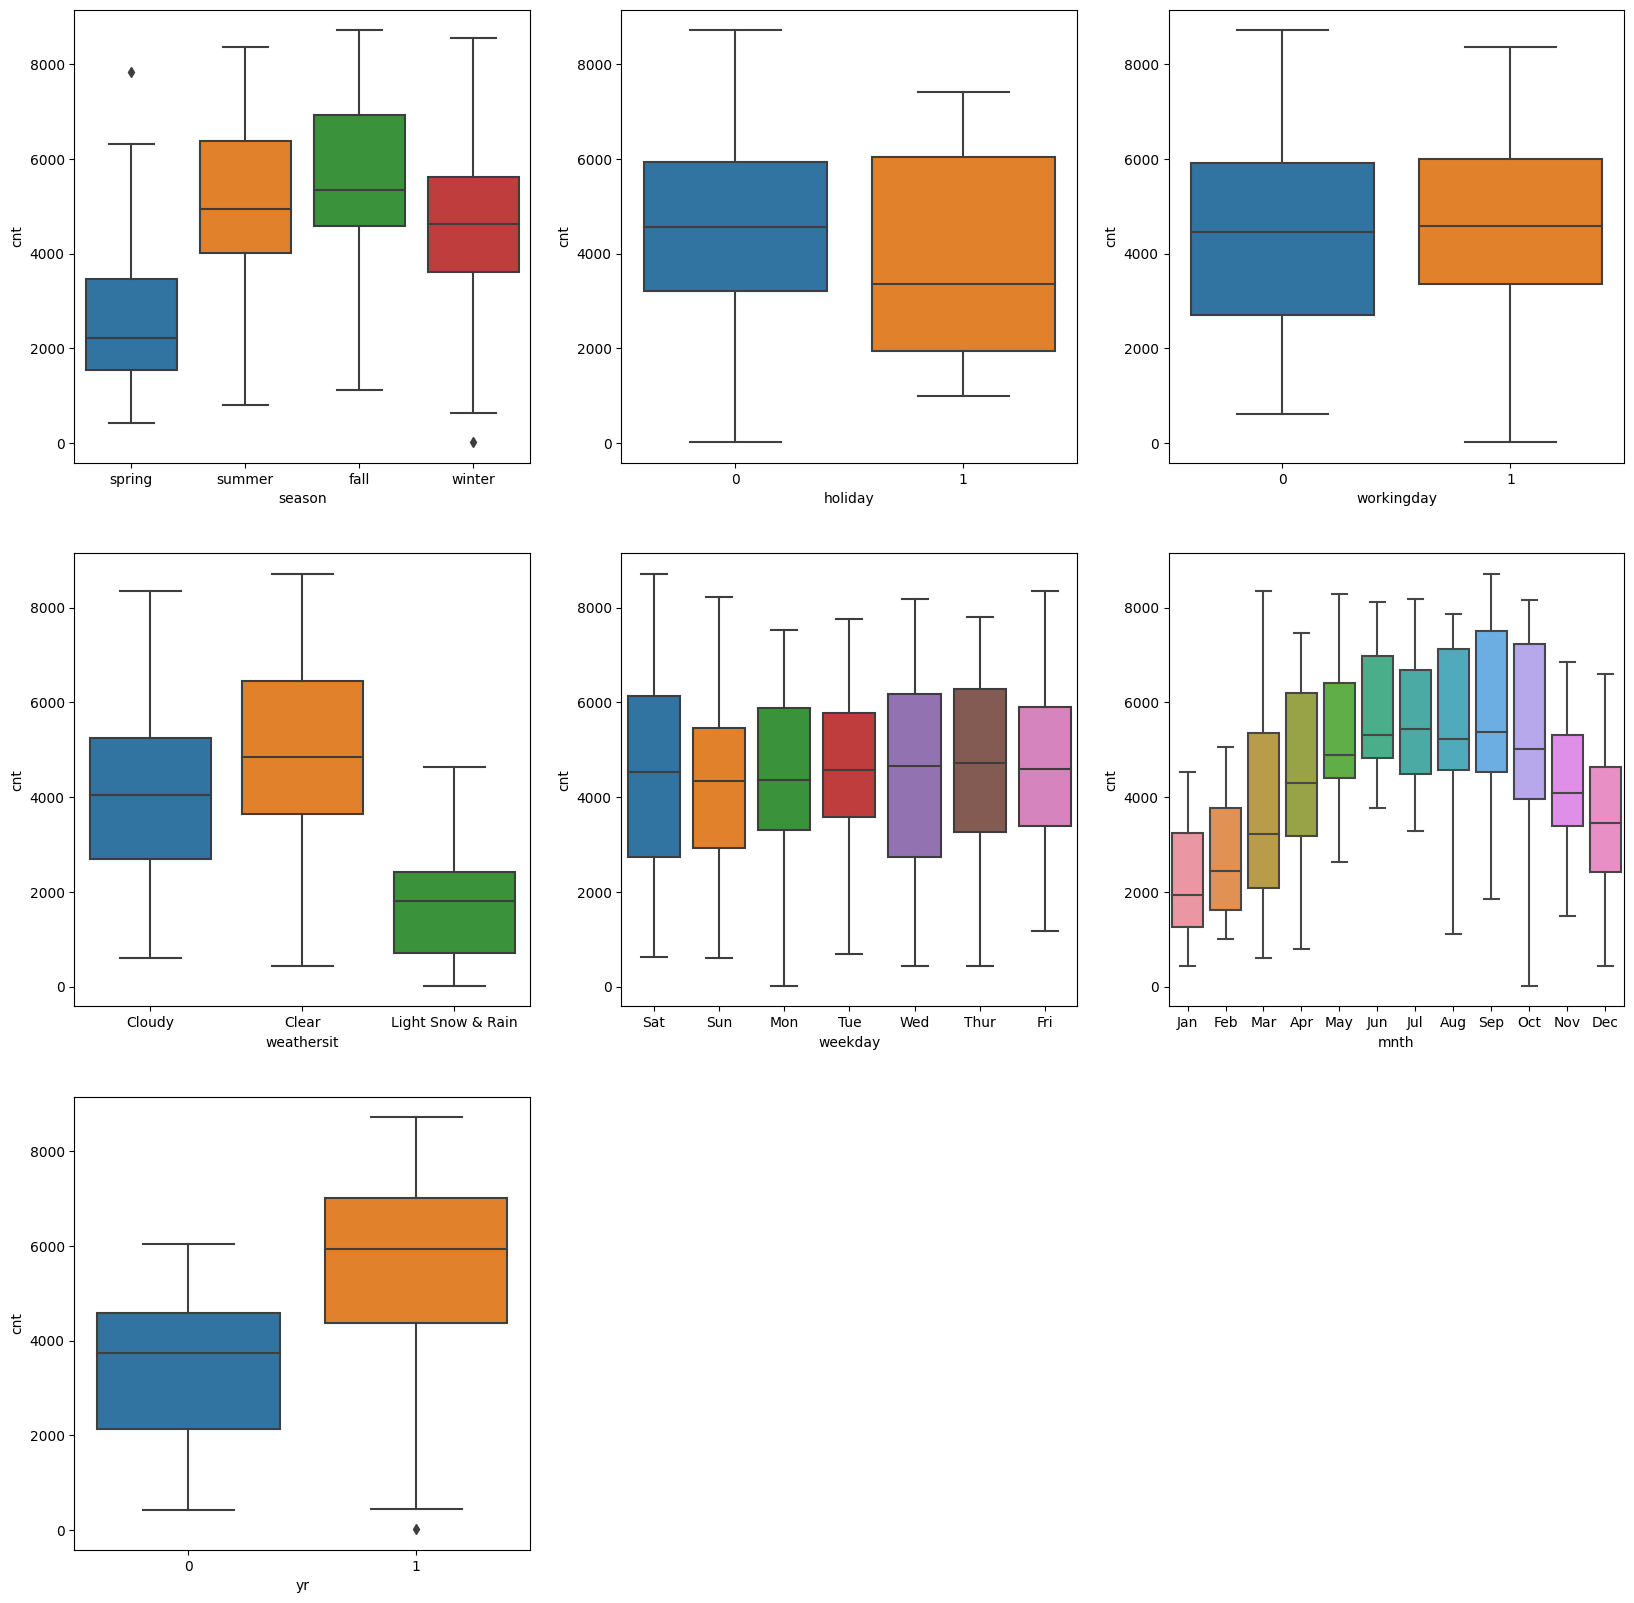

In [31]:
# Visualizing Catagorical Variables Variables using boxplot ogainst the target variable 'cnt'

plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombikes_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombikes_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = boombikes_df)
plt.show()

In [32]:
# Obversation

# Season: Fall emerged as the dominant season for bike bookings, constituting almost 32% of the total with a consistent median of over 5000 bookings throughout the two-year period. Summer and winter followed closely, comprising 27% and 25% of the bookings, respectively. This suggests a strong correlation between season and booking trends, indicating its potential as a significant predictor for the dependent variable.

# Month (mnth): Months 5 to 9 accounted for nearly 10% of the bike bookings individually, showing a consistent median of over 4000 bookings per month. This consistent pattern implies a potential trend in monthly bookings, indicating its relevance as a predictor for the dependent variable.

# Weather Situation (weathersit): 'Weathersit1' dominated the bike bookings, representing almost 67% of the total bookings with a median close to 5000 over the two-year period. 'Weathersit2' followed with 30% of the bookings. This indicates a strong relationship between weather situations and bike bookings, making it a promising predictor for the dependent variable.

# Holiday: Over 97.6% of bike bookings occurred when it wasn't a holiday, revealing a significant bias in the dataset. Consequently, holiday might not be a reliable predictor due to this skewed distribution.

# Weekday: Each weekday showed a narrow range, contributing between 13.5% to 14.8% of the total bookings, with medians ranging from 4000 to 5000 bookings. While there's consistency across the days, the impact of weekdays on bookings might vary, leaving its relevance to the model's discretion.

# Working Day: About 69% of bike bookings happened during 'workingday', with a median of nearly 5000 bookings across the two years. This highlights a potential relationship between working days and bookings, making it a robust contender as a predictor for the dependent variable.

In [33]:
boombikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [34]:
boombikes_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [35]:
# Observation
# The heatmap provides insight into multicollinearity among variables and their correlation with the target variable.
# Referring back-and-forth to this heatmap during linear model construction helps validate correlated values.

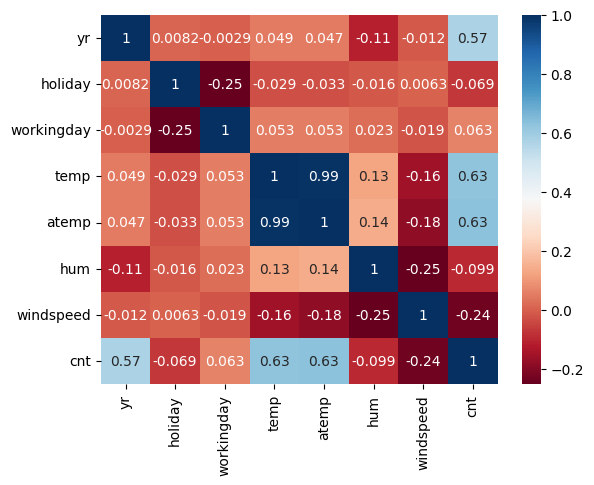

In [36]:
# Correlation Matrix
boombikes_df_numeric = boombikes_df.select_dtypes(include=['int64', 'float64'])  # Filter numerical columns
sns.heatmap(boombikes_df_numeric.corr(), annot=True, cmap="RdBu")
plt.show()


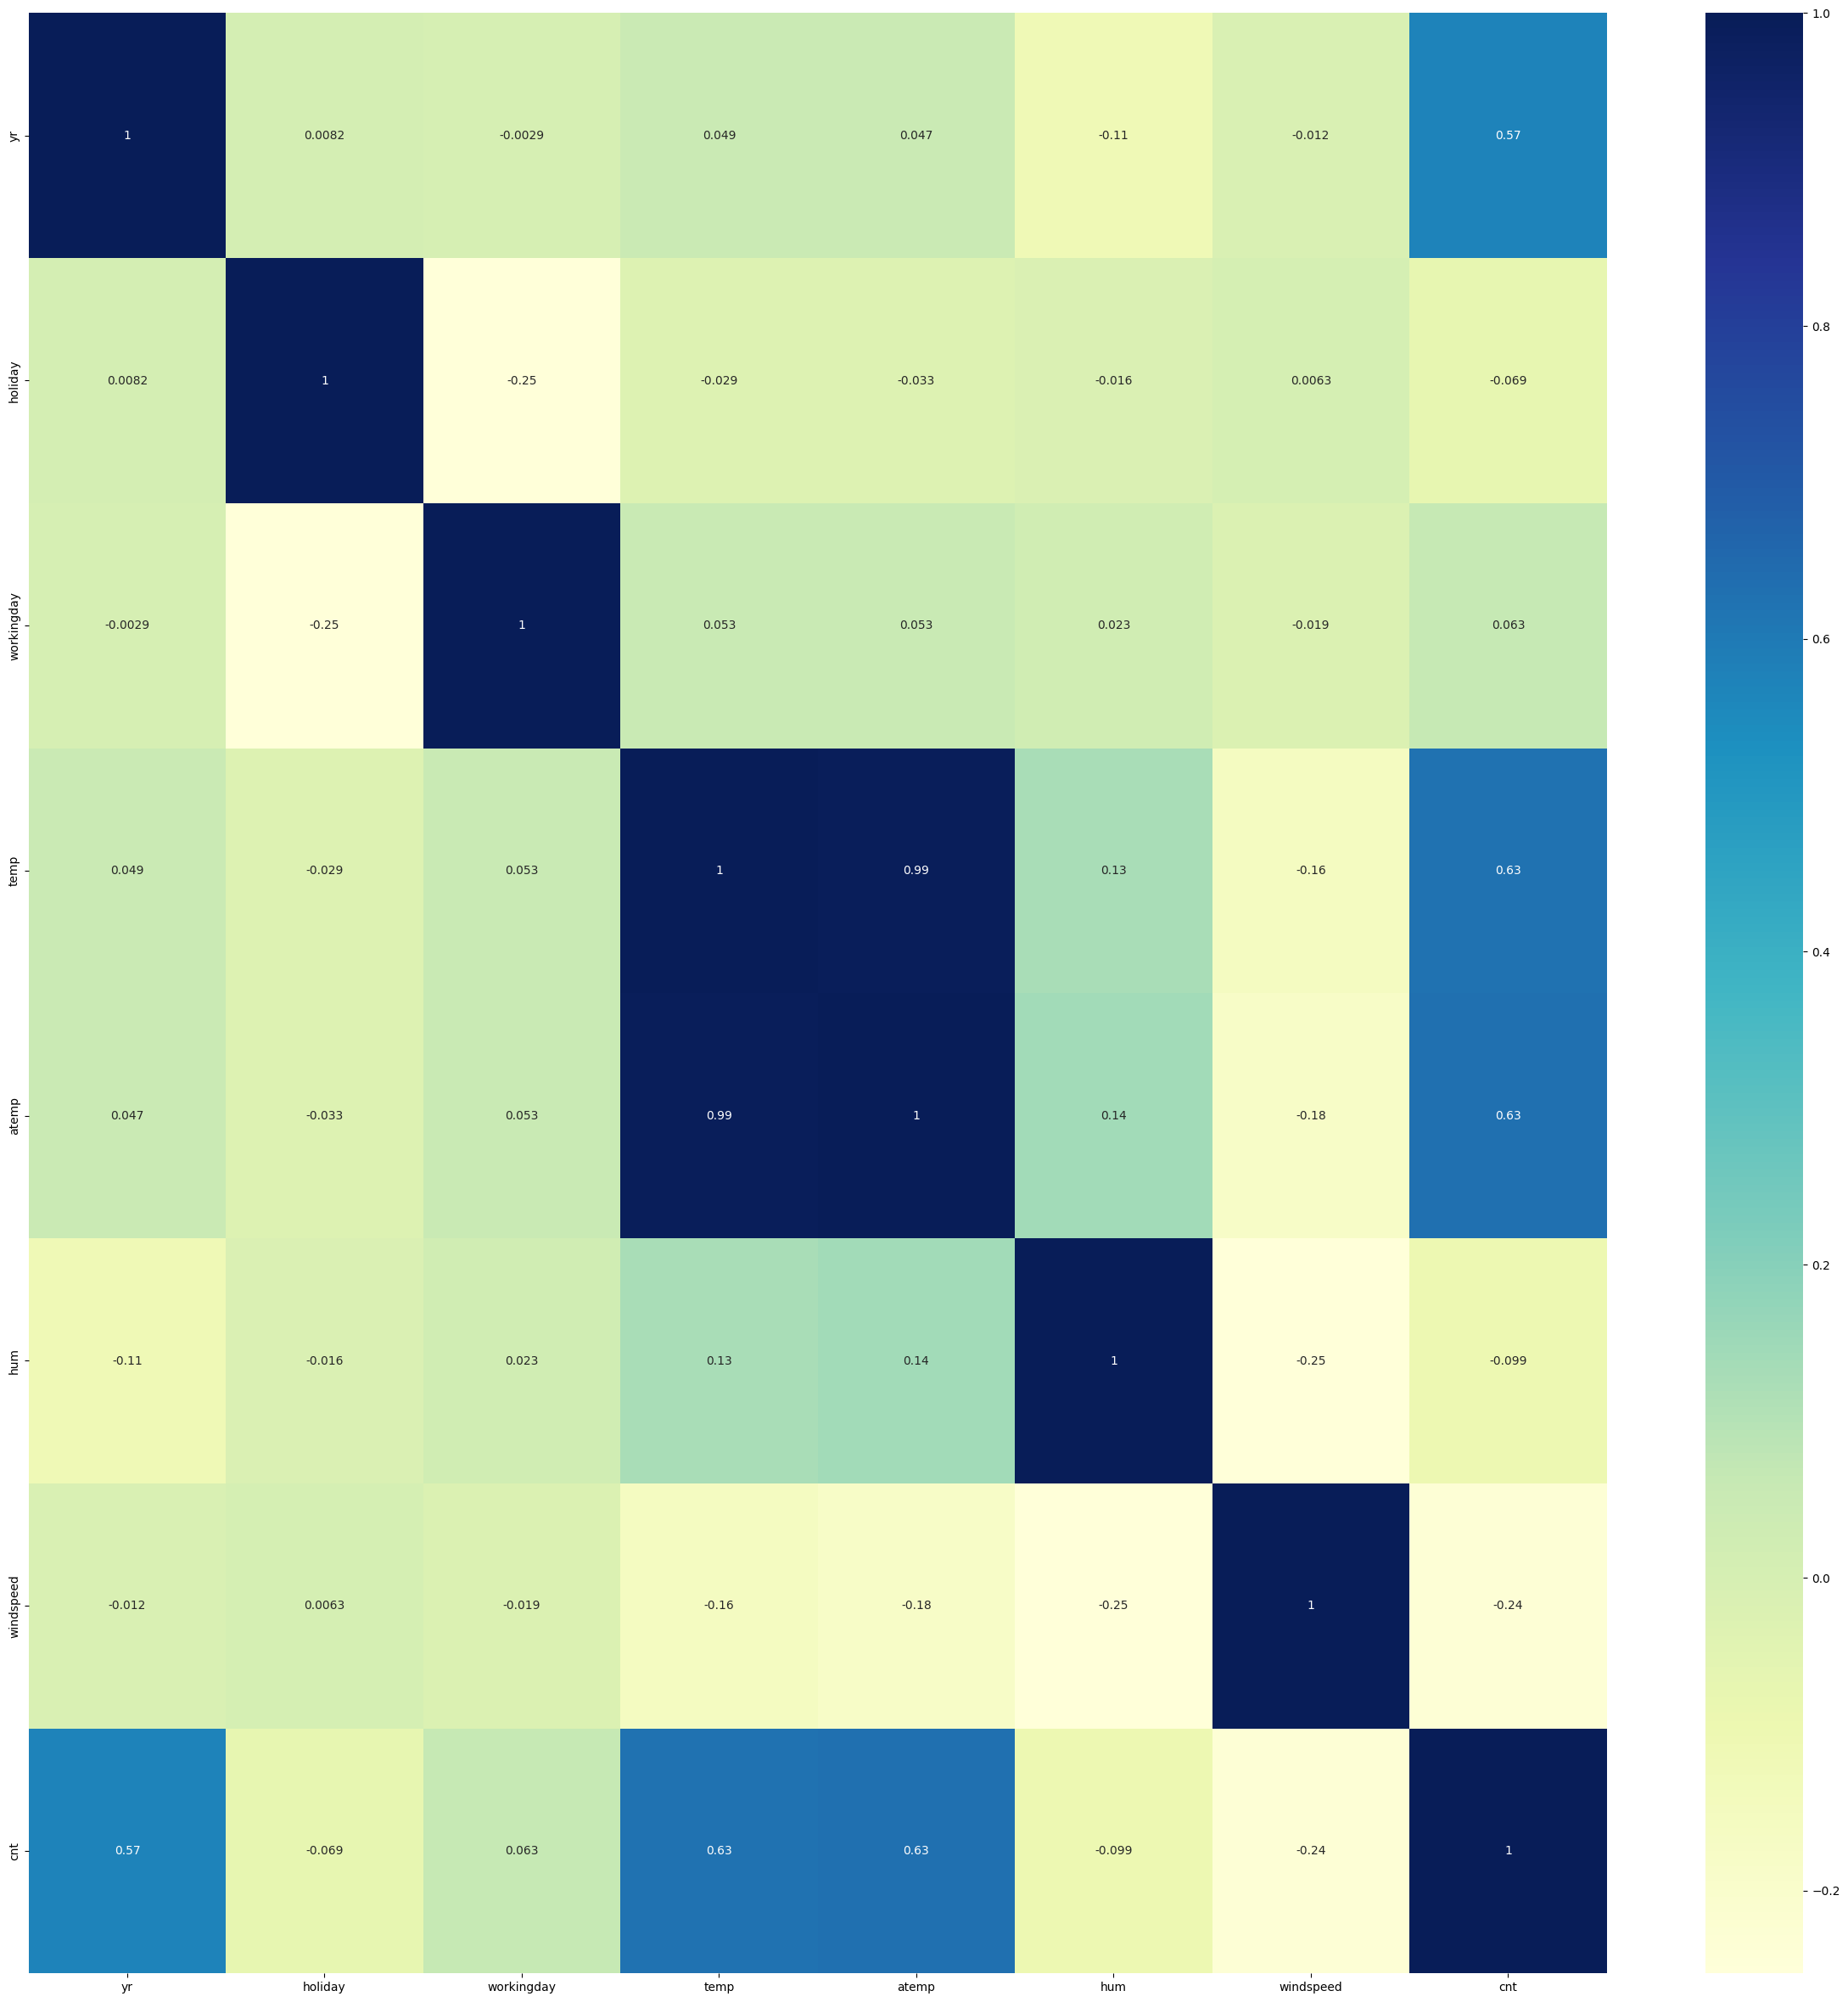

In [37]:
#heatmap
#correlation matrix visualization of the variables of the data
plt.figure(figsize=(30,30))
sns.heatmap(boombikes_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [38]:
#Checking the no of rows and columns of the data
boombikes_df.shape

(730, 12)

In [39]:
#displaying the values post changes
boombikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [40]:
# creating dummy variables
boombikes_df_situation = pd.get_dummies(boombikes_df['weathersit'])
boombikes_df_situation.head()

,Clear,Cloudy,Light Snow & Rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [41]:
# dropping the first row of the dummy variables
boombikes_df_situation = pd.get_dummies(boombikes_df['weathersit'],drop_first= True)
boombikes_df_situation.head()

,Cloudy,Light Snow & Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [42]:
# creating dummy variables
boombikes_df_season_val = pd.get_dummies(boombikes_df['season'])
boombikes_df_season_val.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [43]:
# dropping the first row of the dummy variables
boombikes_df_season_val = pd.get_dummies(boombikes_df['season'],drop_first= True)
boombikes_df_season_val.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [44]:
# creating dummy variables
boombikes_df_weekday_val = pd.get_dummies(boombikes_df['weekday'])
boombikes_df_weekday_val.head()

,Fri,Mon,Sat,Sun,Thur,Tue,Wed
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [45]:
# dropping the first row of the dummy variables
boombikes_df_weekday_val = pd.get_dummies(boombikes_df['weekday'],drop_first= True)
boombikes_df_weekday_val.head()

,Mon,Sat,Sun,Thur,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [46]:
# creating dummy variables
boombikes_df_mnth_val = pd.get_dummies(boombikes_df['mnth'])
boombikes_df_mnth_val.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [47]:
# dropping the first row of the dummy variables
boombikes_df_mnth_val = pd.get_dummies(boombikes_df['mnth'],drop_first= True)
boombikes_df_mnth_val.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [48]:
#concatinating the dummy variables with the data
boombikes_df = pd.concat([boombikes_df,boombikes_df_situation],axis=1)
#boombikes_df.head()

In [49]:
#concatinating the dummy variables with the data
boombikes_df = pd.concat([boombikes_df,boombikes_df_mnth_val],axis=1)
#boombikes_df.head()

In [50]:
#concatinating the dummy variables with the data
boombikes_df = pd.concat([boombikes_df,boombikes_df_season_val],axis=1)
#boombikes_df.head()

In [51]:
#concatinating the dummy variables with the data
boombikes_df = pd.concat([boombikes_df,boombikes_df_weekday_val],axis=1)
#boombikes_df.head()

In [52]:
# displaying the top 5 rows of data post the dummy variables addition
boombikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Cloudy,Light Snow & Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter,Mon,Sat,Sun,Thur,Tue,Wed
0,spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [53]:
#checking the number of clumns and variables of the data
boombikes_df.shape

(730, 34)

In [54]:
# dropping the four columns as we have already created dummy variables for representing these variables
boombikes_df.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)

In [55]:
# displaying the number of rows and columns
boombikes_df.shape

(730, 30)

In [56]:
# printing the column names
boombikes_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Cloudy', 'Light Snow & Rain', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'spring', 'summer', 'winter',
       'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed'],
      dtype='object')

In [57]:
# displaying the top 5 rows
boombikes_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Cloudy,Light Snow & Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter,Mon,Sat,Sun,Thur,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [58]:
boombikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   Cloudy             730 non-null    uint8  
 9   Light Snow & Rain  730 non-null    uint8  
 10  Aug                730 non-null    uint8  
 11  Dec                730 non-null    uint8  
 12  Feb                730 non-null    uint8  
 13  Jan                730 non-null    uint8  
 14  Jul                730 non-null    uint8  
 15  Jun                730 non-null    uint8  
 16  Mar                730 non

In [59]:
# Train and test data split

In [60]:
## splitting the data into train and test
df_train, df_test = train_test_split(boombikes_df, train_size=0.7,test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [61]:
  ## rescaling the features
scaler = MinMaxScaler()
num_vars=['temp','hum','atemp','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Cloudy,Light Snow & Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter,Mon,Sat,Sun,Thur,Tue,Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [62]:
# checking the min and max values of the num_vars
df_train[num_vars].describe()

,temp,hum,atemp,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.512989,0.320768,0.513620
std,0.225844,0.145882,0.212385,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.332086,0.199179,0.356420
50%,0.540519,0.653714,0.526811,0.296763,0.518638
75%,0.735215,0.754830,0.688457,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# training the model

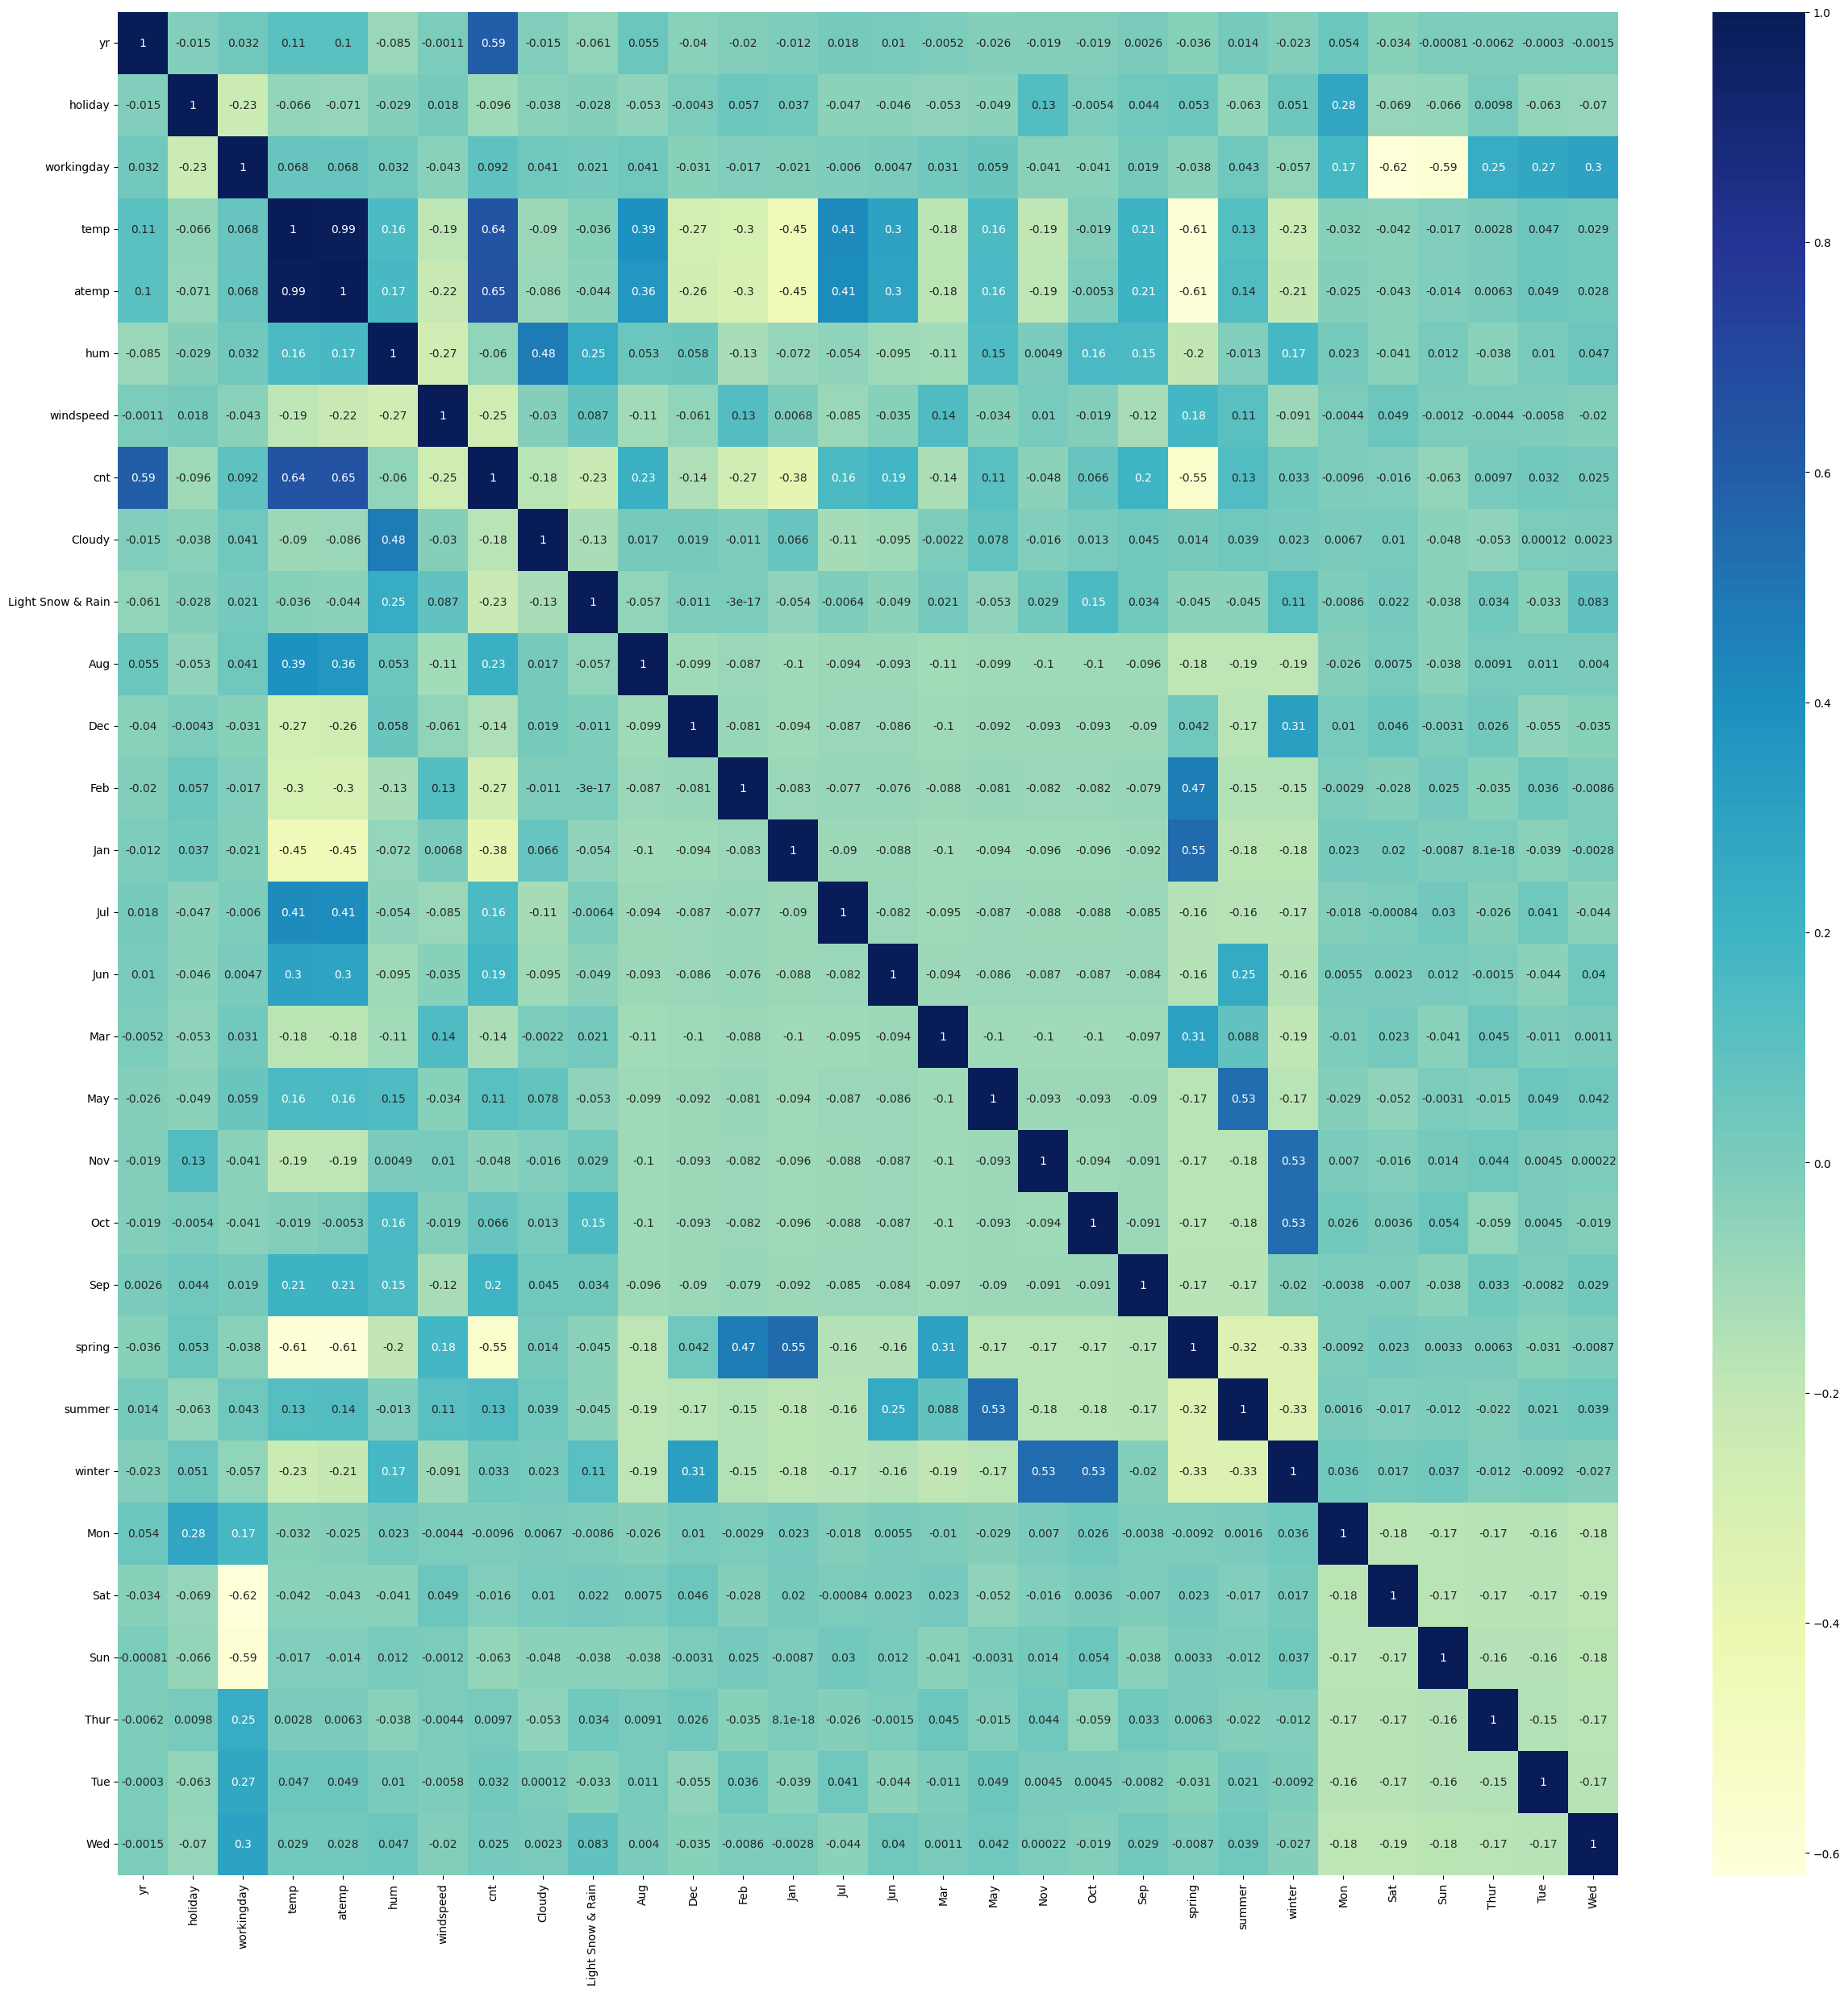

In [64]:
#heatmap
#correlation matrix visualization of the variables of the data
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [65]:
# checking the correlation values of every variable with the target variable - "cnt"
boombikes_df[boombikes_df.columns[1:]].corr()['cnt'][:].sort_values()

spring              -0.561702
Jan                 -0.367167
Feb                 -0.273848
Light Snow & Rain   -0.240602
windspeed           -0.235132
Dec                 -0.173878
Cloudy              -0.170686
Mar                 -0.128456
hum                 -0.098543
holiday             -0.068764
Sun                 -0.059146
Nov                 -0.040344
Mon                 -0.035991
Tue                  0.000560
Sat                  0.009012
Wed                  0.014012
Thur                 0.033551
workingday           0.062542
winter               0.064619
Oct                  0.108846
May                  0.132553
summer               0.145325
Jul                  0.166236
Aug                  0.182100
Sep                  0.194664
Jun                  0.195568
temp                 0.627044
atemp                0.630685
cnt                  1.000000
Name: cnt, dtype: float64

In [66]:
# displaying the no of columns and rows
boombikes_df.shape

(730, 30)

In [67]:
# dividing the train data into x and y
# x being the variables except the target variable
# y contaning the target variable
y_train = df_train.pop('cnt')
x_train = df_train

In [68]:
#displaying the values for y
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [69]:
# displaying the values for x
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Cloudy,Light Snow & Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter,Mon,Sat,Sun,Thur,Tue,Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [70]:
# Building our model

In [71]:
## import rfe and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [72]:
# Running RFE with the output number of the variable equal to 15
from sklearn.feature_selection import RFE

# Initialize the model separately
lm = LinearRegression()


lm.fit(x_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15) # running RFE
rfe = rfe.fit(x_train, y_train)

In [73]:
# listing the ranking by rfe for the selection of the variables
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Cloudy', True, 1),
 ('Light Snow & Rain', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 15),
 ('Mar', False, 14),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thur', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11)]

In [74]:
#displaying the columns selected by rfe
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Cloudy',
       'Light Snow & Rain', 'Jul', 'Sep', 'spring', 'summer', 'winter', 'Sat',
       'Sun'],
      dtype='object')

In [75]:
#displaying the columns not selected by rfe
x_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Mon', 'Thur', 'Tue', 'Wed'],
      dtype='object')

In [76]:
# Building model using statsmodel, for detailed statistics

In [77]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [78]:
# Adding a constant variable
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

In [79]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [80]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.13e-191
Time:                        19:57:19   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1989      0.02

In [81]:
# dropping holiday column as it has the highest p value
x_train_new = x_train_rfe.drop(["holiday"], axis = 1)

In [82]:
# building the model again post dropping a variable
# Adding a constant variable
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train_new)

In [83]:
lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

In [84]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.13e-191
Time:                        19:57:22   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1799      0.04

In [85]:
# displaying the values of the current model
x_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'Cloudy',
       'Light Snow & Rain', 'Jul', 'Sep', 'spring', 'summer', 'winter', 'Sat',
       'Sun'],
      dtype='object')

In [86]:
# as the p values indicate all variables to be significant, we will calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
#X = x_train_new
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,114.08
2,workingday,9.07
13,Sat,6.06
14,Sun,5.74
10,spring,5.02
3,temp,3.62
12,winter,3.49
11,summer,2.61
4,hum,1.91
6,Cloudy,1.57


In [87]:
# dropping the workingday variable as it has high vif
x_train_new = x_train_new.drop(['workingday'], axis=1)

In [88]:
# checking the columns of the model again
x_train_new.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'Cloudy',
       'Light Snow & Rain', 'Jul', 'Sep', 'spring', 'summer', 'winter', 'Sat',
       'Sun'],
      dtype='object')

In [89]:
# building the model again post dropping a variable
#Adding a constant variable
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train_new)

In [90]:
lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

In [91]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.36e-189
Time:                        19:57:29   Log-Likelihood:                 509.56
No. Observations:                 510   AIC:                            -991.1
Df Residuals:                     496   BIC:                            -931.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2797      0.03

In [92]:
# dropping "sat" variable, as it has high p value
x_train_new = x_train_new.drop(["Sat"], axis = 1)

In [93]:
#checking the column names of the model
x_train_new.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'Cloudy',
       'Light Snow & Rain', 'Jul', 'Sep', 'spring', 'summer', 'winter', 'Sun'],
      dtype='object')

In [94]:
## building the model again post dropping a variable
#Adding a constant variable
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train_new)

In [95]:
lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

In [96]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.31e-190
Time:                        19:57:33   Log-Likelihood:                 508.78
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     497   BIC:                            -936.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2833      0.03

In [97]:
#checking the number of columns of the model
x_train_new.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'Cloudy',
       'Light Snow & Rain', 'Jul', 'Sep', 'spring', 'summer', 'winter', 'Sun'],
      dtype='object')

In [98]:
# as the model has no variables with high p vbalue, we will calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
#X = x_train_new
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.37
9,spring,5.01
2,temp,3.61
11,winter,3.49
10,summer,2.61
3,hum,1.91
5,Cloudy,1.57
7,Jul,1.49
8,Sep,1.29
6,Light Snow & Rain,1.25


In [99]:
# dropping the "spring variable" as it has high vif
x_train_new = x_train_new.drop(["spring"], axis = 1)

In [100]:
# building the model again post dropping a variable
# Adding a constant variable
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train_new)

In [101]:
lm = sm.OLS(y_train,x_train_lm).fit()   # Running the linear model

In [102]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          9.40e-190
Time:                        19:57:40   Log-Likelihood:                 504.87
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     498   BIC:                            -934.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2231      0.02

In [103]:
# As there are no variables with high p value, we will calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
#X = x_train_new
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.92
3,hum,1.88
2,temp,1.60
5,Cloudy,1.56
7,Jul,1.43
9,summer,1.33
10,winter,1.29
6,Light Snow & Rain,1.24
8,Sep,1.19
4,windspeed,1.18


In [104]:
# as there are no variables with high p value and high vif. We will consider this as our final model.
#Hence drop the const variable as it would no longer be required.
x_train_new = x_train_new.drop(["const"], axis = 1)

In [105]:
# displaying the variables of our final column
x_train_new.columns

Index(['yr', 'temp', 'hum', 'windspeed', 'Cloudy', 'Light Snow & Rain', 'Jul',
       'Sep', 'summer', 'winter', 'Sun'],
      dtype='object')

In [106]:
# Residual Analysis of the train data

# So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [107]:
y_train_cnt = lm.predict(x_train_lm)

In [108]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

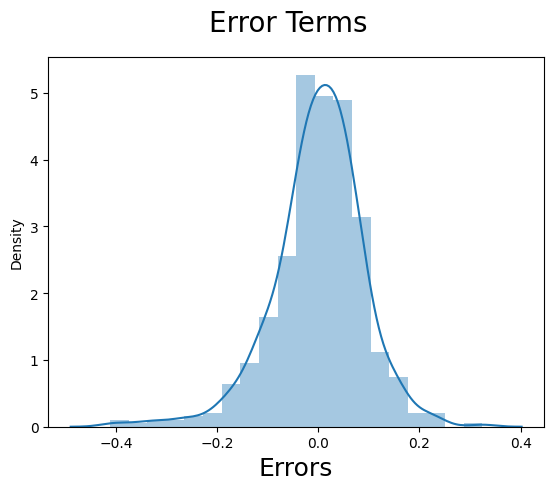

In [109]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [110]:
# Observation
# As shown in the graph, we conclude that the error terms are normally distributed

In [111]:
# Making Predictions

In [112]:
# Applying the scaling on the test sets
# scaling the test variables according to the scaling made on the train data
num_vars=['temp','hum','atemp','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [113]:
# Dividing into X_test and y_test

In [114]:
# dividing the test data into x and y
# x being the variables except the target variable
# y contaning the target variable
y_test = df_test.pop('cnt')
x_test = df_test

In [115]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[x_train_new.columns]

# Adding a constant variable
x_test_new = sm.add_constant(x_test_new)

In [116]:
# Making predictions
y_pred = lm.predict(x_test_new)

In [117]:
# Model Evaluation

In [118]:
## evaluate
r2_score (y_true=y_test,y_pred=y_pred)

0.8033850605733447

Text(0, 0.5, 'y_pred')

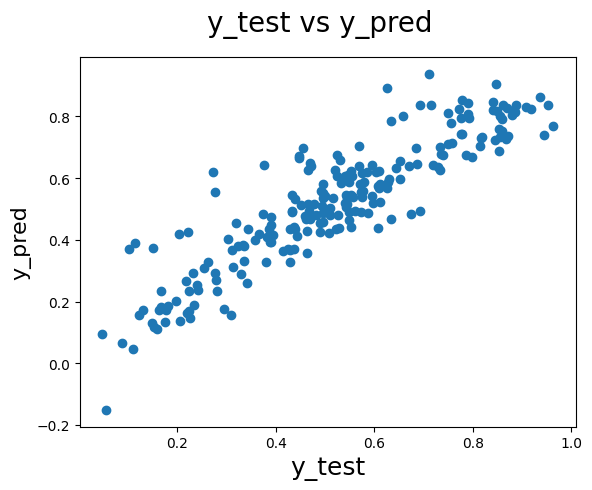

In [119]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [120]:
# The r2 score for our model is 0.80. hence our model is predicting the values very well.

# Out of the various models with different set of variables, this model is the best model with 80% accuracy.

# Hence we consider this model as our final model.

In [121]:
rounded_coefficients = lm.params.round(4)
print(rounded_coefficients)

const                0.2231
yr                   0.2284
temp                 0.5986
hum                 -0.1741
windspeed           -0.1895
Cloudy              -0.0529
Light Snow & Rain   -0.2354
Jul                 -0.0439
Sep                  0.0915
summer               0.0823
winter               0.1359
Sun                 -0.0420
dtype: float64


In [122]:
# Sorting the coefficients in ascending order based on their rounded values
coefficients = lm.params
rounded_coefficients = coefficients.round(4)

coefficients_dict = {coef: round_val for coef, round_val in zip(coefficients.index, rounded_coefficients)}

sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: x[1])

print("Coefficients in ascending order after rounding:")
for coef, round_val in sorted_coefficients:
    print(f"{coef}: {round_val}")


Coefficients in ascending order after rounding:
Light Snow & Rain: -0.2354
windspeed: -0.1895
hum: -0.1741
Cloudy: -0.0529
Jul: -0.0439
Sun: -0.042
summer: 0.0823
Sep: 0.0915
winter: 0.1359
const: 0.2231
yr: 0.2284
temp: 0.5986


In [123]:
# As per our model the variables having significant impact along with their coefficients ( representing positive and negative impact of the variable) are as follows:

# Light Snow & Rain: -0.2354
# windspeed: -0.1895
# hum: -0.1741
# Cloudy: -0.0529
# Jul: -0.0439
# Sun: -0.042
# summer: 0.0823
# Sep: 0.0915
# winter: 0.1359
# const: 0.2231
# yr: 0.2284
# temp: 0.5986

In [124]:
#Comparision between Training and Testing dataset

In [125]:
from sklearn.metrics import r2_score
import numpy as np


# Train dataset R-squared (R²)
train_r2 = r2_score(y_train, y_train_cnt)

# Test dataset R-squared (R²)
test_r2 = r2_score (y_test,y_pred)

# Number of observations and predictors for the train and test datasets
n_train = len(y_train)
n_test = len(y_test)
k = 11

# Train dataset Adjusted R-squared
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - k - 1)

# Test dataset Adjusted R-squared
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - k - 1)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adjusted_r2)
print("Test Adjusted R-squared:", test_adjusted_r2)


Train R-squared: 0.8394037820998701
Test R-squared: 0.8033850605733447
Train Adjusted R-squared: 0.8358564760819958
Test Adjusted R-squared: 0.7929369236955998
